In [7]:
import numpy as np
from time import time as t
import matplotlib.pyplot as plt
import math


In [8]:
#reference from https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
data = open('measurement_data_2023_uint8.bin',"rb").read()
# data = np.fromfile('measurement_data_2023_uint8.bin',dtype='uint8')

In [9]:
#one pass algorithm Approach
#reference from https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance
def shifted_data_variance(data):
    if len(data) < 2:
        return 0.0
    K = data[0]
    n = Expected = Expected2 = 0.0
    for row in data: #for each row in data
        n += 1
        Expected += row - K #finding the expected value 
        Expected2 += (row - K) ** 2 #finding the expected value 2
    variance = (Expected2 - Expected**2 / n) / (n - 1)#calculating the variacne
    return variance
start = t()
print(shifted_data_variance(data))
print("One pass algorithm - execution time in seconds:", t()-start)

1.7878604634731563
Naive Based execution time in seconds: 518.1628551483154


In [ ]:
#naive Approach
#reference from https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance

def variance(data):
    mean = sum(data) / len(data) #finding mean
    print(mean)
    variance = sum((x - mean)**2 for x in data) / len(data)#finding variance
    return variance 
start = t()
print(variance(data))
print("Naive Based execution time in seconds:", t()-start)

In [15]:
#Welford's online algorithm
#reference from https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance

def update(existingAggregate, newValue):
    (count, mean, M2) = existingAggregate
    count += 1 #incrementing count
    delta = newValue - mean
    mean += delta / count #finding mean
    delta2 = newValue - mean 
    M2 += delta * delta2 #finding M2 mean
    return (count, mean, M2)#updating the aggragate and and updaing ew values

# Retrieve the mean, variance and sample variance from an aggregate
def finalize(existingAggregate):
    (count, mean, M2) = existingAggregate
    if count < 2:
        return float("nan") #return nan if vount is less than 2
    else:
        (mean, variance, sampleVariance) = (mean, M2 / count, M2 / (count - 1)) #calculating intermediate values
        print(mean)
        return (mean, variance, sampleVariance)

start = t()
existingAggregate = (0, 0, 0) #exisitng aggreagate values 
for row in data: #for each row in data
    existingAggregate = update(existingAggregate,row)#exisitng aggreagte gets updated

print(finalize(existingAggregate)[-1])
print("Welford’s algorithm - execution time in seconds:", t() - start)

KeyboardInterrupt: 

In [16]:
#histogram method 
from collections import defaultdict

def variance(data):
    n = len(data)
    mean = 0
    histogram = defaultdict(int)
    for row in data:
        histogram[row] += 1 #putting data into histograms
        mean += row
    mean /= n #finding mean
    variance = sum((x - mean)**2 * count for x, count in histogram.items()) / n #calculating the variance
    return variance
start = t()
print(variance(data))
print("Histogram method - execution time in seconds:", t() - start)

1.787860461685296
Histogram method - execution time in seconds: 185.9931104183197


MemoryError: 

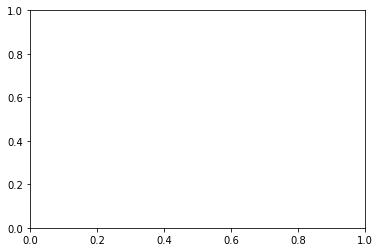

In [17]:
#histogram method using graph - failed due to  memory error
import matplotlib.pyplot as plt

# Generate some random data

# Create a histogram with 20 bins
n, bins, patches = plt.hist(data, bins=20)

# Calculate the sample mean
mean = np.mean(data)

# Calculate the variance
variance = np.sum((bins[:-1] - mean)**2 * n) / (len(data) - 1)

print("Sample variance:", variance)